# Tutorial 01: Cumulative Distribution Transform (CDT)

This tutorial will demonstrate: how to use the forward and inverse operations of the CDT in the *optimaltransport* Python package. We will cover the following transforms:
* Forward and inverse operations of the CDT
* CDT Properties - translation, scaling, and linear separability in CDT space

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams
rcParams.update({'font.size': 12})


Create reference $I_0$ (uniform distribution) and a demo signal $I_1$

In [2]:
N=250
I0= np.ones(N)
x=np.arange(N)
mu=100
sigma=10
I1=1/(sigma*np.sqrt(2*np.pi))*np.exp(-((x-mu)**2)/(2*sigma**2))

Convert signals to strictly positive PDFs

In [3]:
epsilon = 1e-7
I0 = abs(I0) + epsilon
I0 = I0/I0.sum()
I1 = abs(I1) + epsilon
I1 = I1/I1.sum()

# Forward CDT

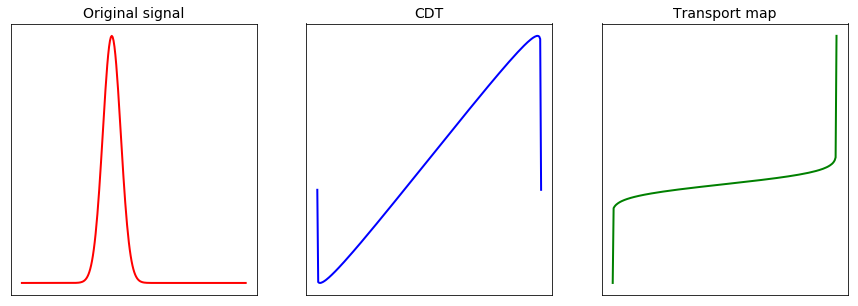

In [4]:
from optrans.continuous.cdt import CDT

# Create a CDT object
cdt = CDT()

# Compute the forward transform
I1_hat, f1_hat = cdt.forward(I0, I1, rm_edge=False)

# Plot I1 and I1_hat
fontSize=14
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(15,5))
ax[0].plot(x,I1, 'r-',linewidth=2)
ax[0].set_title('Original signal',fontsize=fontSize)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].plot(I1_hat, 'b-',linewidth=2)
ax[1].set_title('CDT',fontsize=fontSize)
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].plot(f1_hat, 'g-',linewidth=2)
ax[2].set_title('Transport map',fontsize=fontSize)
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.show()

# Inverse CDT
Reconstruct the original signal $I_1$ from $\hat{I_1}$ using inverse CDT

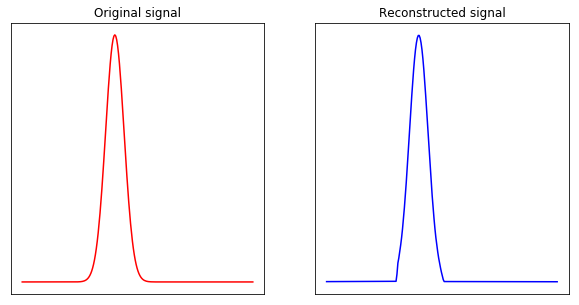

In [5]:
I1_recon = cdt.inverse()

# Plot I1 and I1_recon
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))
ax[0].plot(I1, 'r-')
ax[0].set_title('Original signal')

ax[1].plot(I1_recon, 'b-')
ax[1].set_title('Reconstructed signal')
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

# Translation
Generate a second signal $I_2$ which is a shifted version $I_1$, i.e. $I_2 = I_1(t-\tau)$. Then convert the signals into PDFs and compute CDT for both signals

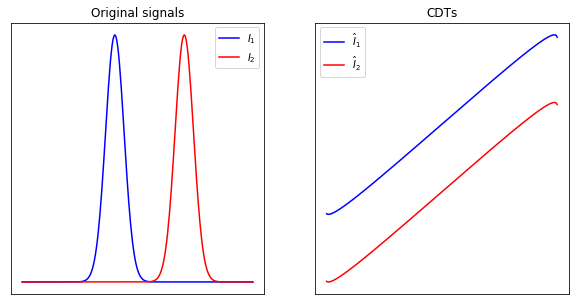

In [6]:
from scipy.ndimage.interpolation import shift
tau = 75
I1=1/(sigma*np.sqrt(2*np.pi))*np.exp(-((x-mu)**2)/(2*sigma**2))

I2 = shift(I1,tau)

# Convert signals to strictly positive PDFs
I1 = abs(I1) + epsilon
I1 = I1/I1.sum()
I2 = abs(I2) + epsilon
I2 = I2/I2.sum()

# Create a CDT object
cdt1 = CDT()

# Compute the forward transform
I1_hat, f1_hat = cdt1.forward(I0, I1, rm_edge=True)
I2_hat, f2_hat = cdt1.forward(I0, I2, rm_edge=True)

#Plot the signals and CDTs
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(10,5))
ax[0].plot(I1, 'b-')
ax[0].plot(I2, 'r-')
ax[0].set_title('Original signals')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].legend([r'$I_1$',r'$I_2$'])

ax[1].plot(I1_hat, 'b-')
ax[1].plot(I2_hat, 'r-')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('CDTs')
ax[1].legend([r'$\hat{I}_1$',r'$\hat{I}_2$'])

plt.show()

# Scaling
Generating a scaled version of $I_1$, i.e. $I_2 = I_1(\alpha t)$, and computing CDTs of both signals.

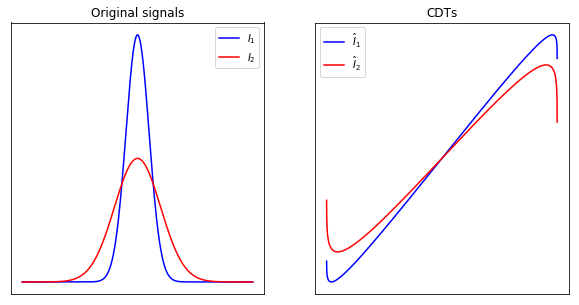

In [7]:
from scipy.stats import norm

x = np.arange(-10,10,0.001)

N=len(x)
I0= np.ones(N)

I1 = norm.pdf(x,0,1)

# create a scaled version of I1, alpha = 0.5
I2 = norm.pdf(x,0,2)

# Convert signals to strictly positive PDFs
I0 = abs(I0) + epsilon
I0 = I0/I0.sum()
I1 = abs(I1) + epsilon
I1 = I1/I1.sum()
I2 = abs(I2) + epsilon
I2 = I2/I2.sum()

# Create a CDT object
cdt2 = CDT()

# Compute the forward transform
I1_hat, f1_hat = cdt2.forward(I0, I1, rm_edge=True)
I2_hat, f2_hat = cdt2.forward(I0, I2, rm_edge=True)

#Plot the signals and CDTs
fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(10,5))
ax[0].plot(I1, 'b-')
ax[0].plot(I2, 'r-')
ax[0].set_title('Original signals')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].legend([r'$I_1$',r'$I_2$'])

ax[1].plot(I1_hat, 'b-')
ax[1].plot(I2_hat, 'r-')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('CDTs')
ax[1].legend([r'$\hat{I}_1$',r'$\hat{I}_2$'])

plt.show()

# Linear Separability
Here we are defining three classes of signal, i.e. class $k \in \{1,2,3\}$. Each class $k$ consists of translated versions of a $k$-modal Gaussian distribution.

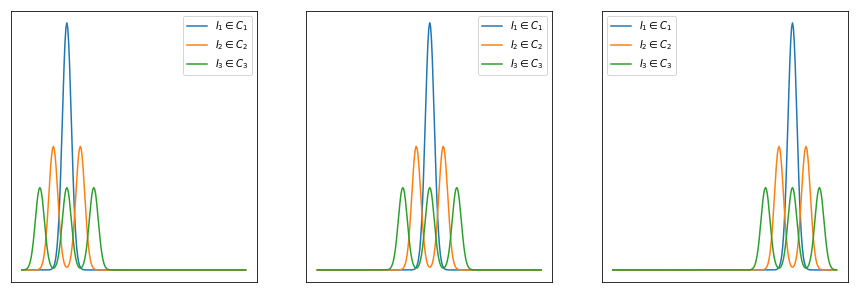

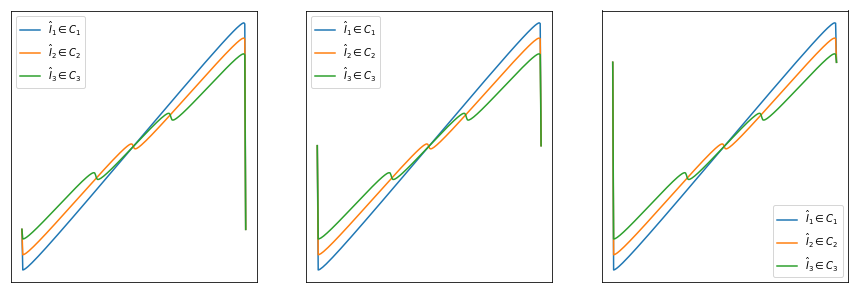

In [8]:
N=250
x=np.arange(N)

# Creating reference signal I0
I0= np.ones(N)
epsilon = 1e-7
I0 = abs(I0) + epsilon
I0 = I0/I0.sum()

# Creating three classes of translated versions of k-modal Gaussian distribution -- skolouri
K=3 # Number of classes
L=500 # Number of datapoints per class  
I=np.zeros((K,L,N))
Ihat=np.zeros((K,L,N))
kmodal_shift=[]
kmodal_shift.append(np.array([0]))
kmodal_shift.append(np.array([-15,15]))
kmodal_shift.append(np.array([-30,0,30]))
sigma=5
for k in range(K):
    for i,mu in enumerate(np.linspace(50,200,L)):
        for j in range(k+1):
            I[k,i,:]+=1/((k+1)*sigma*np.sqrt(2*np.pi))*np.exp(-((x-mu-kmodal_shift[k][j])**2)/(2*sigma**2))
        I[k,i,:] = abs(I[k,i,:]) + epsilon
        I[k,i,:] = I[k,i,:]/I[k,i,:].sum()
        Ihat[k,i,:], _ = cdt.forward(I0, I[k,i,:])
        #Ihat[k,i,:]=cdt.transform(I[k,i,:])
fig,ax=plt.subplots(1,3,figsize=(15,5))
for count,index in enumerate([0,int(L/2),L-1]):
    for k in range(K):
        ax[count].plot(I[k,index,:]) #template
        ax[count].set_xticks([])
        ax[count].set_yticks([])
        ax[count].legend([r'$I_1\in C_1$',r'$I_2\in C_2$',r'$I_3\in C_3$'])
plt.show()

fig,ax=plt.subplots(1,3,figsize=(15,5))
for count,index in enumerate([0,int(L/2),L-1]):
    for k in range(K):
        ax[count].plot(Ihat[k,index,:]) #template
        ax[count].set_xticks([])
        ax[count].set_yticks([])
        ax[count].legend([r'$\hat{I}_1\in C_1$',r'$\hat{I}_2\in C_2$',r'$\hat{I}_3\in C_3$'])
plt.show()

Now we'll do linear classification in Signal and CDT spaces. LDA is used for visualization.

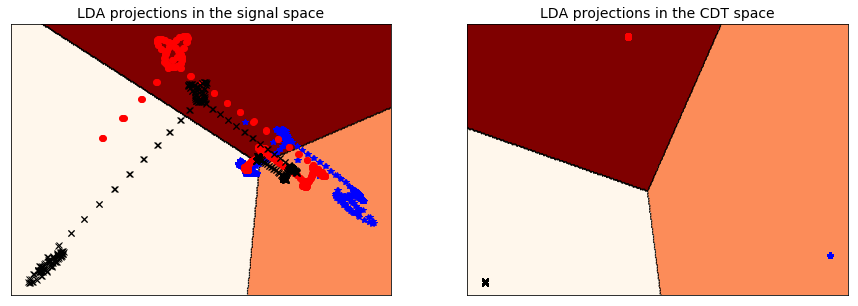

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

X=np.reshape(I,(K*L,N))      #Combine the signals into a features vector X
Xhat=np.reshape(Ihat,(K*L,N))     #Combine the transformed signals into a features vector Xhat
data=[X,Xhat]
label=np.concatenate((np.zeros(L,),np.ones(L,),-1*np.ones(L,))) # Define the labels as -1,0,1 for the three classes
lda=LinearDiscriminantAnalysis(n_components=2)
svm=LinearSVC()
title_=['LDA projections in the signal space','LDA projections in the CDT space']
fig,ax=plt.subplots(1,2,figsize=(15,5))
for i in range(2):
    dataLDA=lda.fit_transform(data[i],label)
    ax[i].plot(dataLDA[:L,0],dataLDA[:L,1],'b*')
    ax[i].plot(dataLDA[L:2*L,0],dataLDA[L:2*L,1],'ro')
    ax[i].plot(dataLDA[2*L:,0],dataLDA[2*L:,1],'kx')
    x_min, x_max = ax[i].get_xlim()
    y_min, y_max = ax[i].get_ylim()
    nx, ny = 400, 200
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
    svm.fit(dataLDA,label)
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:].reshape(xx.shape)
    ax[i].pcolormesh(xx, yy, Z,cmap='OrRd')
    ax[i].contour(xx, yy, Z, linewidths=.5, colors='k')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(title_[i],fontsize=fontSize)
plt.show()